In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("baitap.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


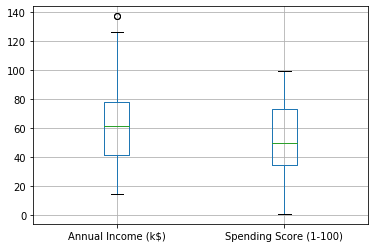

In [21]:
boxplot = df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'])

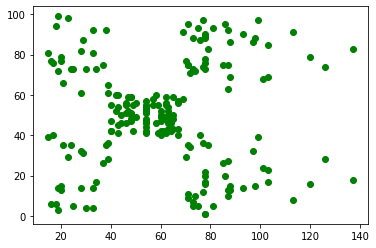

In [23]:
def visualize(df):
    plt.scatter(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], color="g")
visualize(df)

In [47]:
data = df[df['Annual Income (k$)']<110]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
187,101,68
188,103,17
189,103,85
190,103,23


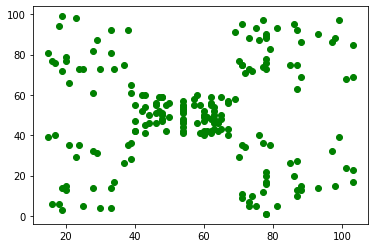

In [48]:
visualize(data)

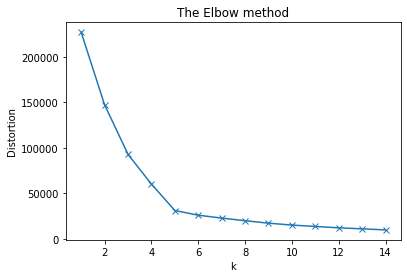

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)

    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(data, range(1,15))

In [84]:
def fit(X, k, loop, eps):
    centers = {}
    init_points = np.random.randint(0, len(X), size=k)
    for i in range(k):
        centers[i] = X.iloc[init_points[i], :].values
    count = 0
    while loop >= count:
        clusters = {i:[] for i in range(k)}
        for x in X.values:
            distance = np.array([np.linalg.norm(x - centers[center]) for center in centers])
            clusters[np.argmin(distance)].append(x)
        before_centers = centers.copy()
        check_eps = False
        for cluster in clusters:
            centers[cluster] = np.mean(clusters[cluster], axis=0)
            if np.abs(centers[cluster] - before_centers[cluster]).all() < eps:
                check_eps = True
        if check_eps:
            break
        count += 1
    return centers
centers = fit(data, 5, 900, 0.002)   
centers

{0: array([25.72727273, 20.22727273]),
 1: array([82.25714286, 82.17142857]),
 2: array([54.41772152, 49.84810127]),
 3: array([82.64705882, 18.76470588]),
 4: array([25.72727273, 79.36363636])}

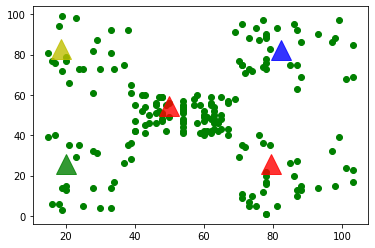

In [85]:
def visualize_result(df, centers):
    visualize(df)
    plt.plot(centers[0][1], centers[0][0], 'g^', markersize = 20, alpha = .8)
    plt.plot(centers[1][1], centers[1][0], 'b^', markersize = 20, alpha = .8)
    plt.plot(centers[2][1], centers[2][0], 'r^', markersize = 20, alpha = .8)
    plt.plot(centers[3][1], centers[3][0], 'y^', markersize = 20, alpha = .8)
    plt.plot(centers[4][1], centers[4][0], 'r^', markersize = 20, alpha = .8)
    
visualize_result(data, centers)

In [69]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters = 5)
clusters.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

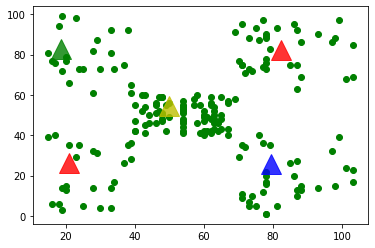

In [70]:
visualize_result(data, clusters.cluster_centers_)

In [71]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, clusters.labels_)
score

0.573371240286752